In [1]:
## Initialization
#pakages
ENV["JULIA_PKG_SERVER"] = "https://jp.pkg.julialang.org"
using Pkg
using CSV
using DataFrames
using DifferentialEquations
using Interpolations
using Plots

#stoi_mat = CSV.read("/Users/hyukpyohong/Dropbox/CRN_model_reduction/Code/stoi-ex2.csv", DataFrame, header = 0)
#source_mat = CSV.read("/Users/hyukpyohong/Dropbox/CRN_model_reduction/Code/source-ex2.csv", DataFrame, header = 0)

stoi_mat = [ -1  1  1  0  0; #E
             -1  1  0  1  0; #S
              1 -1 -1  0  0; #ES
              0  0  1  0 -1; #P
]


#source_mat = Matrix(source_mat)

function Ex2_full(du, u, p, t)
  f = [u[1]*u[2], u[3], (u[3])/(10+u[3]), 1, u[4]]
  r = p .* f
  du_vec = stoi_mat * r
  # du = du_vec
  du[1] = du_vec[1]
  du[2] = du_vec[2]
  du[3] = du_vec[3]
  du[4] = du_vec[4]
  # du = copy(du_vec)
end


Ex2_full (generic function with 1 method)

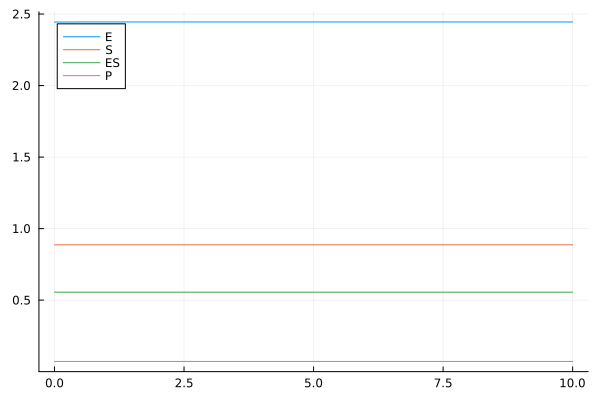

In [53]:
p1 = [0.4*5, 1.2*5, 3.8*5, 0.2*5, 2.8*5]
u0 = [ 2.4444062988792106,
 0.8864328634490612,
 0.5555937011207914,
 0.0714338410887462]

# E + ES = 3
tspan1 = (0.0, 10.0)
# tspan = [0.0, 10.0]

prob1 = ODEProblem(Ex2_full,u0,tspan1,p1)
sol1 = solve(prob1, Vern9())
sol_mat1 = reduce(hcat,sol1.u)'
plot(sol1.t, sol_mat1[:,[1,2,3,4]], label = ["E" "S" "ES" "P"])


In [54]:
size(sol1.t)

(33,)

In [55]:
sol_mat1[84,[1,2,3,4]]

LoadError: BoundsError: attempt to access 33×4 adjoint(::Matrix{Float64}) with eltype Float64 at index [84, [1, 2, 3, 4]]

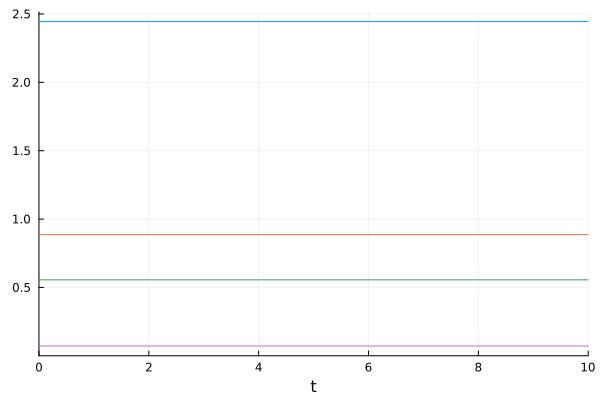

In [56]:
plot(sol1, label = "")

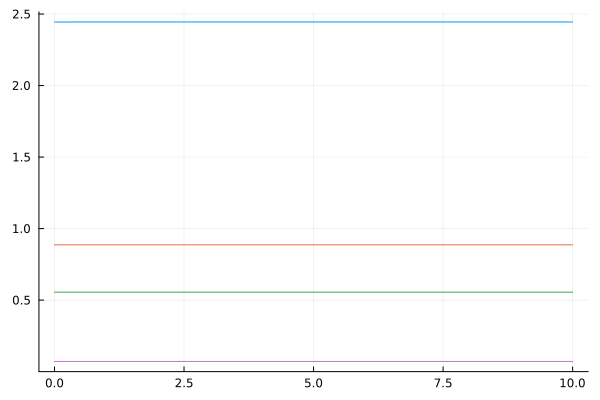

In [57]:
plot(sol1.t, sol_mat1, label = "")

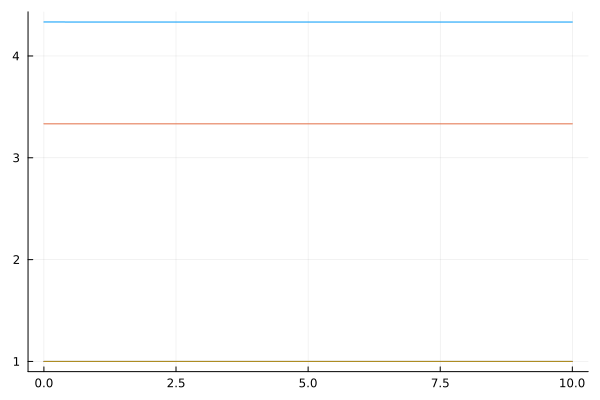

In [58]:
flux_mat1 = zeros((size(sol_mat1)[1], 5))
for i in 1:size(sol_mat1)[1]
  u = copy(sol_mat1[i,:])
  f1 = [u[1]*u[2], u[3], (u[3])/(10+u[3]), 1, u[4]]
  r1 = p1 .* f1
  flux_mat1[i,:] = r1
end
plot(sol1.t, flux_mat1, label = "")

In [59]:

# parameter inside the strong buffering structure:
# k5
p2 = copy(p1)
p2[1] = 0.5*p2[1]

p3 = copy(p2)
#p3[5] = 0.8*p3[5]

length1 = size(sol_mat1)[1]
tspan2 = (10.0, 30.0)
u02 = sol_mat1[length1,:]

4-element Vector{Float64}:
 2.4444443552421897
 0.8863637982450606
 0.5555556447578112
 0.07142894909074637

In [60]:
#u02[1] = u02[1]+3

In [61]:
u02

4-element Vector{Float64}:
 2.4444443552421897
 0.8863637982450606
 0.5555556447578112
 0.07142894909074637

In [62]:
prob2 = ODEProblem(Ex2_full,u02,tspan2,p2)
sol2 = solve(prob2, Vern9())
sol_mat2 = reduce(hcat,sol2.u)'

69×4 adjoint(::Matrix{Float64}) with eltype Float64:
 2.44444  0.886364  0.555556  0.0714289
 2.59902  1.06629   0.400978  0.0583164
 2.61817  1.11396   0.381825  0.0525087
 2.61527  1.17277   0.384733  0.0501117
 2.60767  1.2018    0.392327  0.0507511
 2.59252  1.25284   0.407475  0.0525936
 2.58157  1.28926   0.418429  0.0540025
 2.56859  1.33274   0.431406  0.0556757
 2.55803  1.36847   0.441973  0.0570346
 2.54719  1.40545   0.452814  0.0584255
 2.53768  1.43813   0.462317  0.0596417
 2.52858  1.46969   0.471423  0.0608046
 2.52037  1.49832   0.479628  0.0618501
 ⋮                            
 2.44488  1.77109   0.555117  0.0713746
 2.44484  1.77127   0.555165  0.0713806
 2.44479  1.77143   0.555207  0.0713859
 2.44475  1.77157   0.555245  0.0713906
 2.44472  1.7717    0.555279  0.0713949
 2.44469  1.77181   0.555309  0.0713986
 2.44466  1.77191   0.555336  0.071402
 2.44464  1.772     0.55536   0.071405
 2.44462  1.77208   0.555381  0.0714076
 2.4446   1.77215   0.5554    0.07141


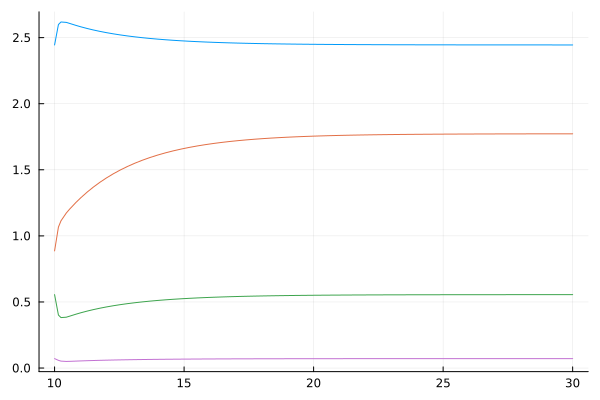

In [63]:
plot(sol2.t, sol_mat2, label = "")

In [64]:
length1 = size(sol_mat1)[1]

33

In [65]:
print(sol_mat1[length1,:])

[2.4444443552421897, 0.8863637982450606, 0.5555556447578112, 0.07142894909074637]

In [66]:
length2 = size(sol_mat2)[1]

69

In [67]:


tspan3 = (30.0, 50.0)
u03 = sol_mat2[length2,:]

4-element Vector{Float64}:
 2.4445766905720747
 1.77223403936584
 0.5554233094279252
 0.0714121842816316

In [68]:
u03[1] = u03[1]+1

3.4445766905720747

In [69]:
u03

4-element Vector{Float64}:
 3.4445766905720747
 1.77223403936584
 0.5554233094279252
 0.0714121842816316

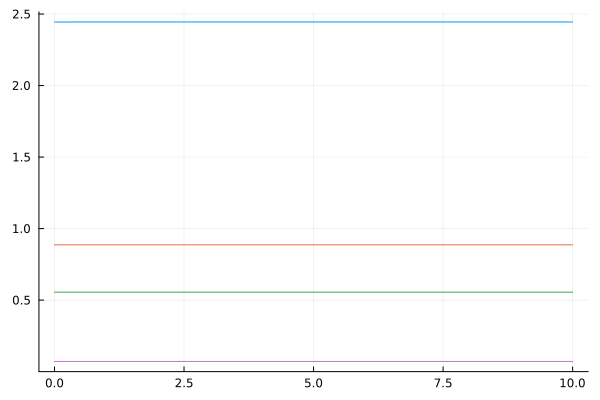

In [70]:
prob3 = ODEProblem(Ex2_full,u03,tspan3,p3)
sol3 = solve(prob3, Vern9())
sol_mat3 = reduce(hcat,sol3.u)'

plot(sol1.t, sol_mat1, label = "")

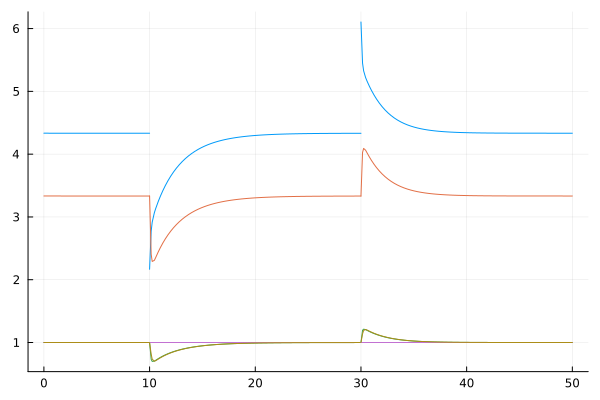

In [71]:
flux_mat2 = zeros((size(sol_mat2)[1], 5))
for i in 1:size(sol_mat2)[1]
  u = copy(sol_mat2[i,:])
  f2 = [u[1]*u[2], u[3], (u[3])/(10+u[3]), 1, u[4]]
  r2 = p2 .* f2
  flux_mat2[i,:] = r2
end

flux_mat3 = zeros((size(sol_mat3)[1], 5))
for i in 1:size(sol_mat3)[1]
  u = copy(sol_mat3[i,:])
  f3 = [u[1]*u[2], u[3], (u[3])/(10+u[3]), 1, u[4]]
  r3 = p3 .* f3
  flux_mat3[i,:] = r3
end


norm_flux_mat1 = zeros(size(flux_mat1))
norm_flux_mat2 = zeros(size(flux_mat2))
norm_flux_mat3 = zeros(size(flux_mat3))

for j in 1:size(flux_mat1)[2]
  norm_flux_mat1[:,j] = flux_mat1[:,j] / flux_mat1[end,j]
  norm_flux_mat2[:,j] = flux_mat2[:,j] / flux_mat1[end,j]
  norm_flux_mat3[:,j] = flux_mat3[:,j] / flux_mat1[end,j]
end

norm_sol_mat1 = zeros(size(sol_mat1))
norm_sol_mat2 = zeros(size(sol_mat2))
norm_sol_mat3 = zeros(size(sol_mat3))

for j in 1:size(sol_mat1)[2]
  norm_sol_mat1[:,j] = sol_mat1[:,j] / sol_mat1[end,j]
  norm_sol_mat2[:,j] = sol_mat2[:,j] / sol_mat1[end,j]
  norm_sol_mat3[:,j] = sol_mat3[:,j] / sol_mat1[end,j]
end

plot(sol1.t[1:length1], flux_mat1[1:length1,:], label = "", color = [1 2 3 4 5 6])
plot!(sol2.t, flux_mat2, label = "", color = [1 2 3 4 5 6])
plot!(sol3.t, flux_mat3, label = "", color = [1 2 3 4 5 6])


In [72]:


sol3.t


68-element Vector{Float64}:
 30.0
 30.15042818023461
 30.252704469291718
 30.436994194510024
 30.570643459389142
 30.79419219137182
 30.98381580200181
 31.237031911426545
 31.47004053403422
 31.736762541150338
 31.999752017425006
 32.28062381200384
 32.56516181113856
  ⋮
 46.53204446638457
 46.85177074254696
 47.171497069528485
 47.49122344732915
 47.81094987594896
 48.13067633421327
 48.45040282212209
 48.77012933967543
 49.08985586569862
 49.40958237901702
 49.72930892197993
 50.0

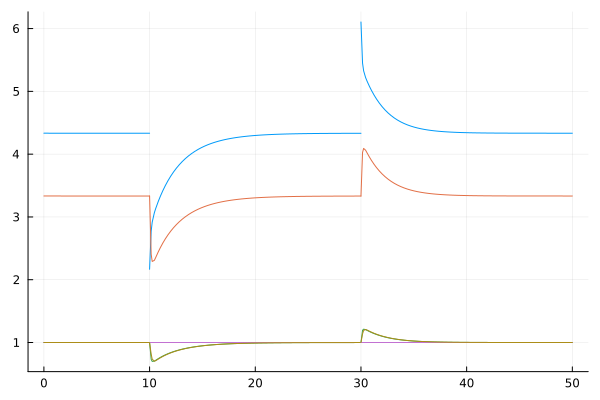

In [73]:
plot(sol1.t[1:length1], flux_mat1[1:length1,:], label = "", color = [1 2 3 4 5 6])
plot!(sol2.t, flux_mat2, label = "", color = [1 2 3 4 5 6])
plot!(sol3.t, flux_mat3, label = "", color = [1 2 3 4 5 6])

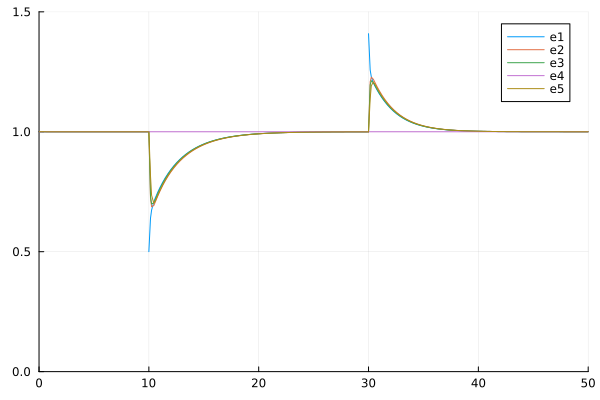

In [74]:

plot(sol1.t[1:length1], norm_flux_mat1[1:length1,:], xlims = (0, 50), ylim = (0, 1.5), label = ["e1" "e2" "e3" "e4" "e5"], color = [1 2 3 4 5])
plot!(sol2.t[1:length2], norm_flux_mat2[1:length2,:], label = "", color = [1 2 3 4 5])
plot!(sol3.t, norm_flux_mat3, label = "", color = [1 2 3 4 5])
# legend()

# plot(sol1.t[1:110], norm_sol_mat1[1:110,:], xlims = (0, 50), ylims = (0, 4), label = "", color = [1 2 3 4 5])
# plot!(sol2.t[1:228], norm_sol_mat2[1:228,:], label = "", color = [1 2 3 4 5])
# plot!(sol3.t, norm_sol_mat3, label = "", color = [1 2 3 4 5])




In [75]:
savefig("Ex2_Flux.svg")

"C:\\Users\\tjrgh\\Downloads\\Flux RPA ODE 코드\\Ex2_Flux.svg"

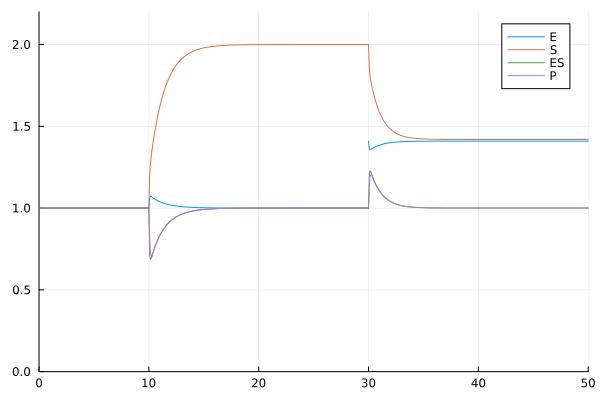

In [52]:

plot(sol1.t[1:length1], norm_sol_mat1[1:length1,:], xlims = (0, 50), ylim = (0, 2.2), label = ["E" "S" "ES" "P"], color = [1 2 3 4])
plot!(sol2.t[1:length2], norm_sol_mat2[1:length2,:], label = "", color = [1 2 3 4])
plot!(sol3.t, norm_sol_mat3, label = "", color = [1 2 3 4])
# legend()

In [59]:
savefig("Ex2_Concen.svg")

"C:\\Users\\tjrgh\\Downloads\\Flux RPA ODE 코드\\Ex2_Concen.svg"

In [ ]:
savefig("/Users/hyukpyohong/Dropbox/CRN_model_reduction/Figures/Flux-ex2-1.svg")